# TP : Introduction à PyTorch


PyTorch est l'une des bibliothèques de deep learning les plus utilisées aujourd'hui, tant dans la recherche que dans l'industrie. Développé par Meta AI, il se distingue par sa grande flexibilité, sa facilité d'utilisation et son mode d'exécution dynamique, qui permet de construire et d'entraîner des modèles de manière intuitive. C'est un outil incontournable pour expérimenter, prototyper et déployer des réseaux de neurones.

Dans ce TP, nous allons découvrir les concepts fondamentaux de PyTorch : la manipulation des tenseurs, l'utilisation de l'autograd pour le calcul automatique de gradients, ainsi que la construction et l'entraînement de modèles simples. L'objectif est de se familiariser avec les briques essentielles permettant de mettre en oeuvre des algorithmes d'apprentissage profond, afin de pouvoir ensuite aborder des architectures plus complexes et des projets plus avancés.

#### Import des bilbliothèques

In [1]:
import torch
import numpy as np
import random

#### Vérification du GPU et configuration du device

PyTorch peut utiliser un GPU NVIDIA pour accélérer les calculs.
torch.cuda.is_available() permet de vérifier la présence d'une carte GPU compatible.

In [12]:
# vérifier l'existance d'une GPU
torch.cuda.is_available()

# Définir le device qu'on veut utiliser
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Q1 : Quel device sera utilisé si aucun GPU n'est disponible ?

Réponse : Le CPU

#### Création de tensors

Depuis une liste Python

In [19]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

Depuis un tableau NumPy

In [20]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

Depuis un autre tensor

In [21]:
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data, dtype=torch.float)

Avec une forme spécifique

In [22]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

Q1 : Quelle différence entre torch.tensor() et torch.from_numpy() ?
    
Réponse : 
- torch.tensor() crée une copie des données.
- torch.from_numpy() crée un tensor qui partage la meme mémoire que les données.

In [ ]:
"""Q2 : Crée un tensor 3×3 rempli de 7."""

x = torch.full((3, 3), 7)

#### Attributs des tensors

In [ ]:
tensor = torch.rand(4,6)

print("ndim =", tensor.ndim)      # nombre de dimensions
print("shape =", tensor.shape)     # forme du tensor
print("dtype =", tensor.dtype)     # type des données
print("device =", tensor.device)    # CPU ou GPU

Q1 : Quelle est la dimension d'un tensor de shape (1, 3, 3) ?
    
Réponse : de dim 3

#### Déplacement vers le GPU

In [ ]:
if torch.cuda.is_available():
    tensor_on_gpu = tensor.to('cuda')
    tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()

Q1 : Que se passe-t-il si vous essayez tensor_on_gpu.numpy() ?

Réponse : erreur **TypeError**. Numpy ne peut pas gérer les données enregistrés dans le GPU

Q2 : Pourquoi faut-il copier le tensor sur le CPU avant d'appeler .numpy() ?
    
Réponse : Car numpy fonctionne uniquement avec la RAM, il faut donc les délacer du GPU vers le CPU

#### Indexation et slicing

In [ ]:
tensor = torch.ones(4, 4)
tensor[0]       # première ligne
tensor[:, 0]    # première colonne
tensor[..., -1] # dernière colonne

tensor[:, 1] = 0

In [ ]:
""" Q1 : Modifie la dernière ligne pour qu'elle contienne [9, 9, 9, 9]. """

tensor[-1, :] = 9

#### Concaténation de tensors

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)

Q1 : Si tensor est un tensor de size (4,4), quelle sera la taille de t1 ?
    
Réponse : 12

#### Opérations mathématiques

Multiplication matricielle

In [ ]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
torch.matmul(tensor, tensor.T, out=y3)

Produit élément par élément

In [ ]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
torch.mul(tensor, tensor, out=z3)

Q1 : Quelle est la condition pour que deux matrices puissent être multipliées ?
    
Réponse : nb colonnes 1 matrice = nb ligne 2 matrice

Opérations in-place

Ces opérations modifient directement le tensor d’origine.

In [ ]:
tensor.add_(5)

Q2 : Pourquoi faut-il faire attention en apprentissage automatique lorsqu'on utilise des opérations in-place ?
    
Réponse : Elles modifient directement les données en mémoire, ce qui peut ecraser des données nécessaires dans la répropagation du gradient.

#### Conversion entre NumPy et PyTorch

In [ ]:
t = torch.ones(5)
n = t.numpy()
t.add_(1)

Q3 : Que se passe-t-il si l'on modifie n après la conversion ?
    
Réponse: Le tensor t sera également modifié.

#### Manipulation des formes (reshape, view, squeeze…)

Reshape

In [ ]:
x = torch.arange(1., 8.)
x_reshaped = x.reshape(1, 7)

View (partage la mémoire)

In [ ]:
z = x.view(1, 7)

Squeeze

In [ ]:
x_squeezed = x_reshaped.squeeze()

Permute

In [ ]:
x_permuted = x_original.permute(2, 0, 1)

Q1 : Quelle est la différence entre .view() et .reshape() ?
    
Réponse : ...

#### Indexation avancée

In [ ]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x[:, 0]      # ligne 0 de la dimension 1
x[:, 1, 1]   # élément central
x[0, 0, :]   # première ligne du premier batch

In [ ]:
"""Q1 : Extraire la diagonale [1, 5, 9]"""

diag = x[0].diagonale()

#### Graine aléatoire (random seed)

In [ ]:
torch.manual_seed(42)
random_tensor_C = torch.rand(3, 4)

Q1 : À quoi sert le random seed ?
    
Réponse : Pour générer les memes nombres aléatoires.

#### Calcul de gradients et Autograd

PyTorch possède un système automatique de différentiation appelé Autograd.
Il permet de calculer facilement les gradients, indispensables pour l'apprentissage automatique.

##### Activer le suivi des gradients : requires_grad=True

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 1
y

##### Calcul du gradient avec .backward()

In [ ]:
y.backward()
x.grad

"x.grad" contient la dérivée de y par rapport à x qui est égale à 2*x+3

Pour x=2, on devrait obtenir 7.

In [ ]:
"""Q1 : Trouver le gradient de la fonction z = 5*(x**3) pour x = 1.0"""

x = torch.tensor(1.0, requires_grad=True)
z = 5 * (x**3)
z.backward()
print(x.grad)

##### Désactiver le suivi des gradients : with torch.no_grad()

Certaines opérations ne doivent pas suivre le calcul des gradients
(ex : évaluation d’un modèle).

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x * 3

with torch.no_grad():
    z = y * 5

print(z.requires_grad)  # False

Q1 : Pourquoi ne pas calculer les gradients durant la phase de test d’un modèle ?

Réponse : On en a pas besoin, economiser la mémoire et accelerer les calculs.

##### Retirer un tensor du graphe de calcul : .detach()

detach() crée une copie du tensor sans suivi des gradients.

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x * 4

z = y.detach()
print(z.requires_grad)  # False

Q1 : Quelle différence entre detach() et with torch.no_grad() ?
    
Réponse : 
- **detach()** renvoie un nouveau tensor exclu du graphe de calcul. 
- **torch.no_grad()** est un contexte global qui empêche temporairement la création de tout graphe de gradient.

##### Exemple complet : descente de gradient simple

On veut minimiser la fonction : f(w) = (w−4)²

Étape 1 : Initialisation

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
learning_rate = 0.1

Étape 2 : Boucle d’optimisation

In [ ]:
for i in range(20):
    loss = (w - 4)**2

    loss.backward()        # calcul du gradient
    with torch.no_grad():
        w -= learning_rate * w.grad  # mise à jour

    w.grad.zero_()         # remettre le gradient à zéro !

    print(f"Iteration {i+1} | w = {w.item():.4f} | loss = {loss.item():.4f}")

Q1 : Que se passe-t-il si tu ne fais pas w.grad.zero_() ?
    
Réponse : Les gradients s'additionnent à chaque itération au lieu d'être recalculés. La mise à jour des poids deviendrait énorme, menant à une divergence.

##### model.eval() : à quoi ça sert ?

model.eval() place le modèle en mode évaluation.

Cela affecte uniquement certains modules qui se comportent différemment entre :

    mode entraînement : model.train()
    mode évaluation : model.eval()

model.eval() permet de modifier le comportement :

BatchNorm

    Entrainement : utilise les statistiques du batch courant
    Évaluation : utilise les moyennes/variances stockées pendant l'apprentissage

Dropout

    Entrainement : désactive aléatoirement certains neurones
    Évaluation : aucun dropout (les neurones restent actifs à 100 %)

#### Régression linéaire avec PyTorch (sans nn.Module)

Dans cette section, on va entraîner un modèle simple : y = 3*x + 2

L'objectif est que de retrouve automatiquement les paramètres w et b.

In [ ]:
# Données d'entraînement

X = torch.arange(0, 10, dtype=torch.float32).reshape(-1, 1)
y = 3 * X + 2

In [ ]:
# Initialisation des paramètres du modèle (w et b)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True

In [ ]:
# Définition du modèle

def linear_model(x):
    return w * x + b

In [ ]:
# Fonction de perte (MSE)

def loss_fn(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

In [ ]:
# Boucle d’entraînement

learning_rate = 0.01
for epoch in range(200):
    y_pred = linear_model(X)
    loss = loss_fn(y_pred, y)

    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss = {loss:.4f} | w={w.item():.3f}, b={b.item():.3f}")

# À la fin, w devrait être proche de 3 et b proche de 2.

Q1 : Que se passe-t-il si on augmente le learning_rate à 1.0 ?
    
Réponse : Le modèle va diverger

#### Régression linéaire avec torch.nn

Définition du modèle

In [ ]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

Fonction de perte + Optimiseur

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Boucle d’entraînement

In [ ]:
for epoch in range(200):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss = {loss:.4f}")


In [ ]:
"""Q1 : Comment accéder aux paramètres appris ?"""

for a, b in model.named_parameters():
    print(a, b.item())

In [ ]:
"""Q2 : Ajouter une deuxième couche linéaire."""

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 1)
        self.linear2 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        return x

model = LinearRegressionModel()

#### Qu'est-ce que ça change d'ajouter une deuxième couche linéaire ?

Dans PyTorch, une couche linéaire réalise la transformation suivante :

$$\text{Linear}(x) = Wx + b$$

---

##### 1. Une seule couche linéaire

Si notre modèle contient une seule couche linéaire, alors il apprend une relation strictement linéaire :

$$\hat{y} = W_1 x + b_1$$

C'est équivalent à une régression linéaire classique. Le modèle ne peut apprendre qu'une droite.

---

##### 2. Deux couches linéaires consécutives (sans activation)

Exemple :

```python
self.linear1 = nn.Linear(1, 1)
self.linear2 = nn.Linear(1, 1)

def forward(self, x):
    x = self.linear1(x)
    x = self.linear2(x)
    return x
```
Mathématiquement : 

$$\hat{y} = W_2 (W_1 x + b_1) + b_2$$
    
En développant : 

$$\hat{y} =  (W_1 W_2) x + (W_2 b_1 + b_2)$$

Le modèle reste linéaire... Même si on ajoute plusieurs couches linéaires consécutives, sans activation, le résultat final est toujours une seule transformation linéaire équivalente.

##### Quand est-ce que plusieurs couches deviennent intéressantes ?

Uniquement quand on ajoute une fonction d'activation non linéaire entre les couches :

```python
self.linear1 = nn.Linear(1, 10)
self.relu = nn.ReLU()
self.linear2 = nn.Linear(10, 1)

def forward(self, x):
    return self.linear2(self.relu(self.linear1(x)))
```

Maintenant notre modèle devient :

$$\hat{y} = W_2 \sigma(W_1 x + b_1) + b_2$$

où $\sigma$ est une non-linéarité (ReLU, tanh, sigmoid…).

Le modèle n'est plus linéaire. Il peut apprendre des relations non linéaires, comme : courbes, polynômes, fonctions périodiques, données complexes…

#### Dataset & DataLoader (gestion des données)

Les DataLoader permettent de charger les données par batches, mélangées (shuffle) ou non.

Création d’un Dataset personnalisé

In [ ]:
from torch.utils.data import Dataset, DataLoader

class SimpleDataset(Dataset):
    def __init__(self):
        self.X = torch.arange(0, 10, dtype=torch.float32).reshape(-1, 1)
        self.y = 3 * self.X + 2

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

Charger le Dataset dans un DataLoader

In [ ]:
dataset = SimpleDataset()
loader = DataLoader(dataset, batch_size=2, shuffle=True)

Parcourir un DataLoader

In [ ]:
for batch_X, batch_y in loader:
    print(batch_X, batch_y)

Q1 : Que fait l'argument shuffle=True ?
    
Réponse : Il mélange aléatoirement les données à chaque nouvelle epoch.

#### Application sur un vrai jeu de données d'images (MNIST via torchvision)

MNIST contient des images de chiffres 28×28 = 784 pixels.

In [2]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Fonction pour convertir les images en tenseurs et les normaliser (optionnel mais classique).

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),              # image PIL to tensor (C,H,W) entre 0 et 1
    # transforms.Normalize((0.5,), (0.5,))  # optionnel : normalisation
])

Télécharger MNIST

In [4]:
# Le dataset sera téléchargé dans le dossier "./data"

train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

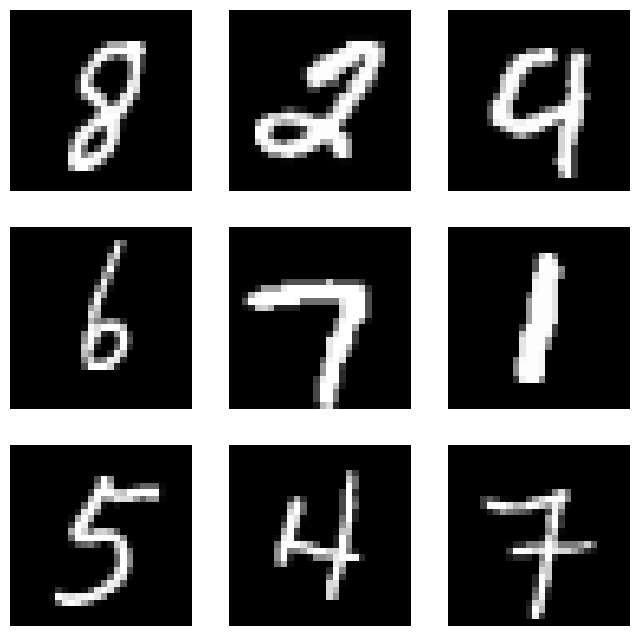

In [5]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Créer les Dataloader

In [6]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=64, shuffle=False)

### Réseaux de Neurones Profonds : MLP & CNN

Dans cette partie, nous allons créer :

    un MLP (Multi-Layer Perceptron) pour la classification de chiffres (MNIST)

    un CNN simple pour apprendre à classifier des images 1 canal (MNIST)

L'objectif est d'introduire les principales briques des architectures modernes.

#### MLP (Multi-Layer Perceptron)

Un MLP est composé uniquement de couches linéaires, séparées par des activations.

Ex :
Entrée -> Linear -> ReLU -> Linear -> ReLU -> Linear -> Sortie

In [ ]:
"""Modèle MLP TODO """

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten() 
        self.layers = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10) 
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)



Fonction de perte + Optimiseur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

Exemple de la boucle d'entraînement (un seul epoch)

In [ ]:
for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    y_pred = mlp(X_batch)
    loss = criterion(y_pred, y_batch)
    loss.backward()
    optimizer.step()

Q1 : Quelle activation remplace ReLU dans un MLP profond ?
    
Réponse : LeakyReLU, GELU, SiLU

Exemple de code d'entrainement du modèle pour plusieurs epochs

In [ ]:
"""Boucle d'entrainement pour 10 epochs TODO"""

num_epochs = 100
plt_loss = []

for epoch in range(num_epochs):
    running_loss = 0.0
    mlp.train() # Mode entrainement
    
    for X_batch, y_batch in train_loader:
        
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        y_pred = mlp(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    plt_loss.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")

In [ ]:
plt.plot(plt_loss)

Evaluation sur le jeu de test

In [ ]:
mlp.eval()
test_correct = 0
test_total = 0

for X_batch, y_batch in test_loader:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    y_pred = mlp(X_batch)
    _, predicted = torch.max(y_pred, 1)
    test_total += y_batch.size(0)
    test_correct += (predicted == y_batch).sum().item()

print(f"Final Test Accuracy : {test_acc:.3f}")

#### Notes:

- model.train() :
    active certaines couches comme Dropout, BatchNorm en mode entraînement.

- model.eval() :
    met le modèle en mode évaluation (pas de Dropout, BatchNorm en mode inference).

- with torch.no_grad() :
    désactive la construction du graphe de gradients (moins de mémoire, plus rapide).

- torch.max(y_pred, dim=1) :
    récupère la classe prédite.

#### NN (Convolutional Neural Network)

Les CNN sont utilisés pour traiter les images.
Ils exploitent :

    des filtres convolutifs

    des features locales

    des réductions de dimension (MaxPool)

Architecture d'un CNN simple
Schéma général :

- Entrée (1×28×28)
- Conv2d
- ReLU
- MaxPool2d
- Flatten
- Linear
- Linear
- Sortie (10 classes)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            ...
        )

        self.fc_layers = nn.Sequential(
            ...
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # flatten
        return self.fc_layers(x)

cnn = SimpleCNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

In [ ]:
for X_batch, y_batch in loader:
    optimizer.zero_grad()
    y_pred = cnn(X_batch)
    loss = criterion(y_pred, y_batch)
    loss.backward()
    optimizer.step()

Q1 : Quel est le rôle de MaxPool2d ?
    
Réponse : Il reduit la taille des images. Cela diminue le nombres de paramètres, et le cout.
    
Q2 : Pourquoi les CNN sont-ils plus efficaces que les MLP sur les images ?

Réponse : ...

In [ ]:
"""Créer un CNN avec :
    3 couches convolutives
    1 couche dense finale
    des BatchNorm entre les convolutions
"""

class BetterCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            # Bloc 1
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2), # Sortie: 14x14
            
            # Bloc 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2), # Sortie: 7x7
            
            # Bloc 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2) 
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 128), 
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

### Exercice : Construire un Autoencodeur

Un autoencodeur est un réseau capable de :

- Encoder une donnée (image) dans un espace latent de dimension réduite.
- Décoder cette représentation latente pour reconstruire l'image d'origine.

Utilisation : débruitage, compression, détection d'anomalies, génération…


Consignes :

1. Créer une classe Autoencoder(nn.Module)

2. Implémenter :
    - un encodeur (MLP)
    - un espace latent de faible dimension (ex : 16)
    - un decodeur symétrique


3. Utiliser une loss MSE pour mesurer la qualité de reconstruction

4. Entraîner l'autoencodeur sur MNIST (train set uniquement)

5. Afficher :
    - une image originale
    - son image reconstruite


6. Tester différentes tailles de la couche latente (2, 8, 32…)


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, latent_dim=16):
        super().__init__()

        ## ---- ENCODEUR ----
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )

        ## ---- DECODEUR ----
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(-1, 1, 28, 28)
        return decoded




In [16]:
model = Autoencoder(latent_dim=16)


In [17]:
# Optimiseur & loss
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [24]:
# Boucle d'entraînement (train_loader déjà défini)
for epoch in range(5):
    model.train()
    running_loss = 0.0
    
    for X_batch, _ in train_loader:
        X_batch = X_batch.to(device)
        
        optimizer.zero_grad()
        reconstructed = model(X_batch)
        loss = criterion(reconstructed, X_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")    

Epoch 1, Loss: 0.0229
Epoch 2, Loss: 0.0210
Epoch 3, Loss: 0.0199
Epoch 4, Loss: 0.0192
Epoch 5, Loss: 0.0186


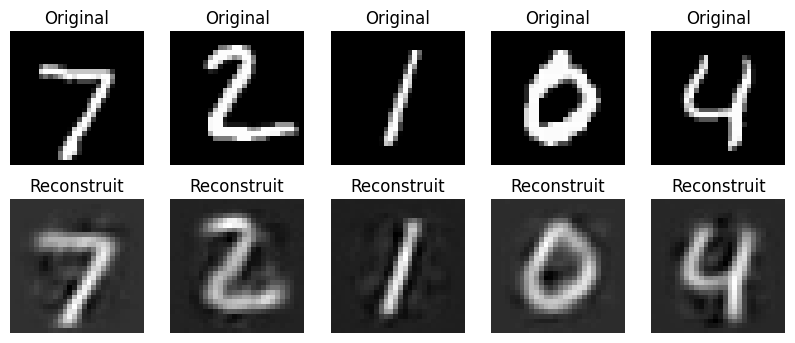

In [25]:
model.eval()
with torch.no_grad():
    
    images, _ = next(iter(test_loader))
    images = images.to(device)
    output = model(images)
    
    
    n = 5
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Image originale
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Image reconstruite
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(output[i].cpu().squeeze(), cmap='gray')
        plt.title("Reconstruit")
        plt.axis("off")
    plt.show()

Tests avec latent_dim = 8

In [26]:
model = Autoencoder(latent_dim=8)


In [27]:
# Optimiseur & loss
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [28]:
# Boucle d'entraînement (train_loader déjà défini)
for epoch in range(5):
    model.train()
    running_loss = 0.0
    
    for X_batch, _ in train_loader:
        X_batch = X_batch.to(device)
        
        optimizer.zero_grad()
        reconstructed = model(X_batch)
        loss = criterion(reconstructed, X_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")    

Epoch 1, Loss: 0.0368
Epoch 2, Loss: 0.0272
Epoch 3, Loss: 0.0255
Epoch 4, Loss: 0.0245
Epoch 5, Loss: 0.0239


On remarque que l'erreur est plus grande comparé à 16.

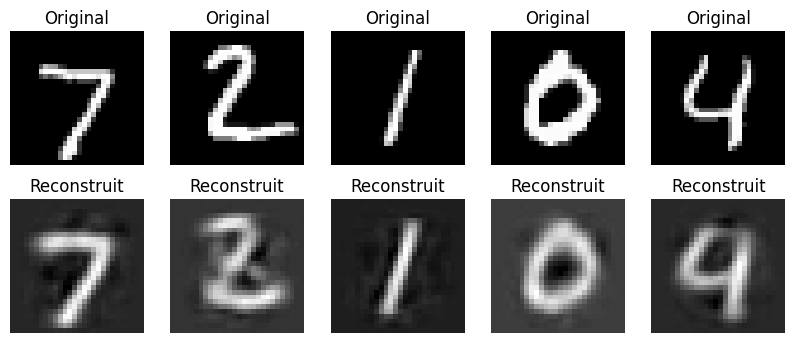

In [29]:
model.eval()
with torch.no_grad():
    
    images, _ = next(iter(test_loader))
    images = images.to(device)
    output = model(images)
    
    
    n = 5
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Image originale
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Image reconstruite
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(output[i].cpu().squeeze(), cmap='gray')
        plt.title("Reconstruit")
        plt.axis("off")
    plt.show()

avec latent_dim = 8, le modèle reconstruit les images de manière moins nette qu'avec 16, le 4 à la fin peut mm etre mépris pour un 9.

Test latent_dim = 32

In [30]:
model = Autoencoder(latent_dim=32)


In [31]:
# Optimiseur & loss
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [32]:
# Boucle d'entraînement (train_loader déjà défini)
for epoch in range(5):
    model.train()
    running_loss = 0.0
    
    for X_batch, _ in train_loader:
        X_batch = X_batch.to(device)
        
        optimizer.zero_grad()
        reconstructed = model(X_batch)
        loss = criterion(reconstructed, X_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")    

Epoch 1, Loss: 0.0327
Epoch 2, Loss: 0.0205
Epoch 3, Loss: 0.0181
Epoch 4, Loss: 0.0169
Epoch 5, Loss: 0.0161


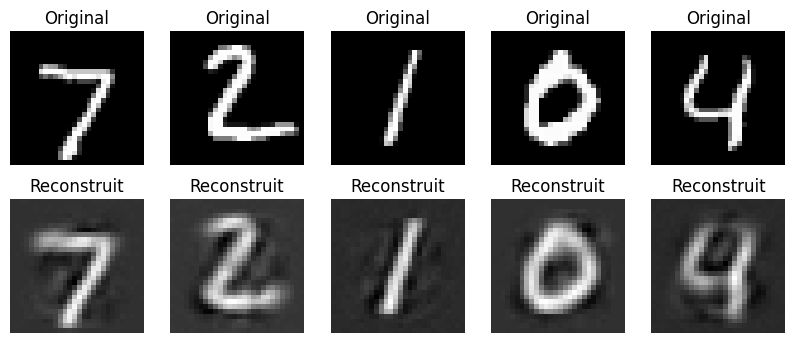

In [33]:
model.eval()
with torch.no_grad():
    
    images, _ = next(iter(test_loader))
    images = images.to(device)
    output = model(images)
    
    
    n = 5
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Image originale
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Image reconstruite
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(output[i].cpu().squeeze(), cmap='gray')
        plt.title("Reconstruit")
        plt.axis("off")
    plt.show()